In [1]:
from pre_processing import *
from lda_mallet import *

from os import walk


#reading data
datafolder = './data/ed_recovery_formatted/Excel'
#datafolder = 'ed_recovery_topicmodel'
df = pd.DataFrame(columns=['url','type','photo','date','tags','notes','text','photo_url','reblogged','blog_name'])

for dirpath,dirnames,filenames in walk(datafolder):
  for filename in filenames:
    if filename.endswith('.xlsx'):
      t = pd.read_excel(datafolder+'/'+filename,names=['url','type','photo','date','tags','notes','text','photo_url','reblogged'])
      blog_name = t.iloc[0,0].split(':')[1]
      t['blog_name'] = blog_name
      df = df.append(t.iloc[3:,:],ignore_index=True)
      print('blog:{0}   with posts:{1}    and reblogs:{2}  '.format(filename,len(t),len(t[t.reblogged=='yes'])))


print('number of blogs: {0} - number of posts: {1}'.format(len(set(df.blog_name)),len(df)))
print('out of {0} documents, {1} are reblogged.'.format(len(df),len(df[df.reblogged == 'yes'])))

#finding reblogged texts
texts = sorted(df.text) #sort them to keep smallest post (perhaps original one) at first
re_texts = []

while len(texts):
  t = [texts.pop(0)]#pop first text and find it!
  if t[0] == ' ' or len(t[0].split())<3: 
    continue #almost nothing to look
  i = 0
  while i<len(texts):
    if t[0] in texts[i]:
      t.append(texts.pop(i))
    else:
      i += 1
  if len(t) > 1:
    re_texts.append(t)


print('number of unique reblogged texts: {0}'.format(len(re_texts)))
print('number of unique string in all texts: {0}'.format(len(set(df.text))))

extra_stopwords = ['isnt','want','cant','wanna','im','could','ive','would','dont','get','also','us','thats','got','ur','wanted',
                   'may', 'the', 'just', 'can', 'think', 'damn', 'still', 'guys', 'literally', 'hopefully', 'much', 'even', 'rly', 'guess', 'anon']#anything with a length of one
                   

'''pre-processing'''
original_doc_set = list(df.text[df.photo=='no'])
pre_processed_docs,filtered_docs = preprocess_data(original_doc_set,extra_stopwords=extra_stopwords)
vocab_dict, doc_term_matrix = prepare_corpus(pre_processed_docs)

print('size of orginal dataset: {0} and size of the pre-processed dataset: {1}'.format(len(original_doc_set),len(pre_processed_docs)))

pre_processed_docs_lem,filtered_docs_lem = preprocess_data(original_doc_set,extra_stopwords=extra_stopwords,lemmatized=True)
vocab_dict_lem, doc_term_matrix_lem = prepare_corpus(pre_processed_docs_lem)

print('Vocab size before lemmatiziation: {0} and after lemmatization: {1}'.format(len(vocab_dict),len(vocab_dict_lem)))


[nltk_data] Downloading package stopwords to /Users/das-
[nltk_data]     lab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/das-lab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/das-lab/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/das-lab/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


blog:mote-of-dust_formatted.xlsx   with posts:271    and reblogs:238  
blog:fuck-eatingdisorders_formatted.xlsx   with posts:37    and reblogs:4  
blog:hellsite-residential_formatted.xlsx   with posts:247    and reblogs:191  
blog:lets-get-better_formatted.xlsx   with posts:509    and reblogs:453  
blog:bagelbells_formatted.xlsx   with posts:1101    and reblogs:1046  
blog:imtrying-butimpissed_formatted.xlsx   with posts:838    and reblogs:483  
blog:faithhopeloveandtherapy_formatted.xlsx   with posts:2994    and reblogs:1510  
blog:finallyrecoveringforgood_formatted.xlsx   with posts:137    and reblogs:49  
blog:intentandotrascender_formatted.xlsx   with posts:21    and reblogs:0  
blog:fearless-foodie_formatted.xlsx   with posts:3956    and reblogs:3670  
blog:ariessuntaurusrising_formatted.xlsx   with posts:504    and reblogs:206  
blog:rec-hovery_formatted.xlsx   with posts:22    and reblogs:7  
blog:shameofateen_formatted.xlsx   with posts:54    and reblogs:2  
blog:brittle-bunny_

In [1]:
from pre_processing import *
#loading the dataset we train the model on
text_df = newsgroup('./data/20newsgroup_preprocessed.csv')
doc_list = list(text_df.text_cleaned)
pre_processed_docs,filtered_docs = preprocess_data(doc_list)
vocab_dict_, doc_term_matrix_ = prepare_corpus(pre_processed_docs)

[nltk_data] Downloading package stopwords to /Users/das-
[nltk_data]     lab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/das-lab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/das-lab/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/das-lab/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
# vocab_dict_['existence']
vocab_dict_.token2id['ax']

13588

In [5]:
#loading reference corpus
wiki_docs = loading_wiki_docs('./data/wiki_sampled_5p.txt')
pre_processed_wiki,no_var = preprocess_data(wiki_docs)
vocab_dict, doc_term_matrix = prepare_corpus(pre_processed_wiki)

#loading the dataset we train the model on
text_df = newsgroup('./data/20newsgroup_preprocessed.csv')
doc_list = list(text_df.text_cleaned)
pre_processed_docs,filtered_docs = preprocess_data(doc_list)
vocab_dict_, doc_term_matrix_ = prepare_corpus(pre_processed_docs)

In [104]:
def reading_results(res,topic_num,itreations):
  '''
  Reading result to get top terms and log-likelihood every 50 iterations

  returns: Log-Likelihood and all_top terms for each 50 iterations

  parameter res: all the command prompt prints and results (type:str)
  '''

  #reading the string
  current_line = 9#where to start in CSV file
  stp1 = topic_num+2#where to read Log-Likelihood
  stp2 = 6 #constant number of lines to get to topics again

  #please set the number of iteration to what you set for your topic model
  all_top_terms = []#storing all top terms
  LLs = []
  for _i in range(int(itreations/50)):
    #top_terms = []
    for i in range(topic_num):#reading top 
      try:
        #reading top terms splited by two tabs + the second split is for splitting the terms with space
        #excluding the last item using [0:-1].  because the last item is '\n'
        all_top_terms.append(res[current_line].split('\t')[2].split(' ')[0:-1])
      except:
        print(res[current_line-2:current_line+3],current_line)
      current_line+=1#going to next line
    current_line+=1 #going to LL
    if _i>3: #optimizing alpha would add [beta] update after 250 iterations and we want to add one line for that
      current_line +=1
    LLs.append(float(res[current_line].split(': ')[1]))
    current_line += stp2
    #all_top_terms.append(top_terms)

  return all_top_terms,LLs

In [42]:
with open('t.csv','r') as csvfile:
    res = csvfile.readlines()
#   res = res.split('\n')
all_top_terms,LLs = reading_results(res,3,250)
coherence = []

In [127]:
ls = [[50,    20,   0.004915 ,-9.06850],
[100,    20,   0.004915 ,-9.01428],
[150,    20,   0.004915, -8.99469],
[200,    20,   0.004915, -8.98494],
[250,    20,   0.004915, -8.94926],
[50,    10,   0.004915 ,-9.06850],
[100,    10,   0.004915 ,-9.01428],
[150,    10,   0.004915, -8.99469],
[200,    10,   0.004915, -8.98494],
[250,    10,   0.004915, -8.94926]]
stats = pd.DataFrame(data=ls,columns=['iterations','top_n','coherence','LL'])

Text(0, 0.5, 'Log-Likelihood')

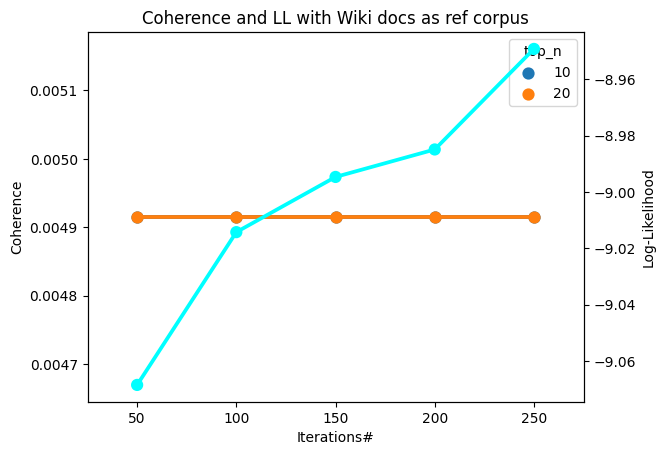

In [130]:
import seaborn as sns

ax = sns.pointplot(x='iterations',y='coherence',hue='top_n',data=stats)
plt.title('Coherence and LL with Wiki docs as ref corpus')
plt.ylabel('Coherence')
plt.xlabel('Iterations#')

ax2 = ax.twinx()
sns.pointplot(x='iterations',y='LL',data=stats,color='cyan')
plt.ylabel('Log-Likelihood')

In [48]:
for top_terms in all_top_terms:
    coherence.append(CoherenceModel(topics=top_terms,dictionary=vocab_dict,texts=pre_processed_wiki,topn=5,coherence='c_npmi').get_coherence())

In [72]:
att = []
for t in all_top_terms:
    att.extend(t)
len(att)

15

In [75]:
c = CoherenceModel(topics=att,dictionary=vocab_dict,texts=pre_processed_wiki,topn=5,coherence='c_npmi').get_coherence_per_topic()
# c = CoherenceModel.for_topics(topics_as_topn_terms=all_top_terms,dictionary=vocab_dict,texts=pre_processed_wiki,topn=5,coherence='c_npmi')

In [81]:
import numpy as np

for i in range(int(len(c)/3)):
    print(np.mean(c[(i*3):(i+1)*3]))
print(att)

-0.034990134261869206
-0.034990134261869206
-0.022959832256112058
-0.02963498672697713
-0.02963498672697713
[['ax', 'article', 'god', 'max', 'apr', 'ca', 'good', 'cs', 'game', 'jesus', 'year', 'john', 'team', 'christian', 'time', 'games', 'gv', 'play', 'bible', 'mike'], ['system', 'windows', 'mail', 'file', 'bit', 'problem', 'drive', 'data', 'program', 'work', 'software', 'dos', 'uk', 'computer', 'information', 'ac', 'run', 'car', 'card', 'image'], ['people', 'time', 'government', 'make', 'article', 'state', 'years', 'law', 'point', 'fact', 'things', 'world', 'made', 'question', 'good', 'day', 'back', 'long', 'case', 'part'], ['ax', 'article', 'god', 'max', 'apr', 'ca', 'cs', 'game', 'good', 'jesus', 'year', 'team', 'john', 'games', 'gv', 'play', 'bible', 'st', 'bf', 'cc'], ['system', 'windows', 'mail', 'file', 'bit', 'problem', 'drive', 'data', 'program', 'work', 'software', 'information', 'dos', 'computer', 'uk', 'car', 'ac', 'run', 'time', 'key'], ['people', 'time', 'article', 'gove

In [68]:
# c.estimate_probabilities()
c.get_coherence_per_topic(),c.get_coherence()

([-0.2535461115729519], -0.2535461115729519)

In [70]:
all_top_terms[0]

[['ax',
  'article',
  'god',
  'max',
  'apr',
  'ca',
  'good',
  'cs',
  'game',
  'jesus',
  'year',
  'john',
  'team',
  'christian',
  'time',
  'games',
  'gv',
  'play',
  'bible',
  'mike'],
 ['system',
  'windows',
  'mail',
  'file',
  'bit',
  'problem',
  'drive',
  'data',
  'program',
  'work',
  'software',
  'dos',
  'uk',
  'computer',
  'information',
  'ac',
  'run',
  'car',
  'card',
  'image'],
 ['people',
  'time',
  'government',
  'make',
  'article',
  'state',
  'years',
  'law',
  'point',
  'fact',
  'things',
  'world',
  'made',
  'question',
  'good',
  'day',
  'back',
  'long',
  'case',
  'part']]

In [4]:
from pre_processing import ap_corpus
import pandas as pd
import numpy as np

docs = list(ap_corpus('./data/ap.txt').text)
text_df = pd.DataFrame(zip(np.arange(1,len(docs)),docs),columns=['int_values','text'])

In [6]:
from rpy2 import robjects #loading R inside Python
#importing functions to read pandas DF
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter

from pre_processing import ap_corpus

import pandas as pd

import numpy as np

#import R base library
base = importr('base')


# pd_df = pd.DataFrame({'int_values': [1,2,3],'text': ['The first example is not too long'
  # , 'second example have to be short, too.', 'basically trying to write another example']})
docs = list(ap_corpus('./data/ap.txt').text)
text_df = pd.DataFrame(zip(np.arange(1,len(docs)),docs),columns=['int_values','text'])
with localconverter(robjects.default_converter + pandas2ri.converter):
  r_from_pd_df = robjects.conversion.py2rpy(text_df)


# ans = robjects.r(
#   '''
#   library(readr)
#   source('./coherence.R')
#   x = {0}
#   print({1})
#   '''.format(12,22))

robjects.r.source('stm.R')
ans = robjects.r.run_stm(text_df,topic_n=10,max_itr=50)


R[write to console]: Loading required package: reader

R[write to console]: Loading required package: NCmisc

R[write to console]: 
Attaching package: ‘reader’


R[write to console]: The following objects are masked from ‘package:NCmisc’:

    cat.path, get.ext, rmv.ext


R[write to console]: Loading required package: stm

R[write to console]: stm v1.3.6 successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com

R[write to console]: Loading required package: tm

R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘tm’


R[write to console]: The following object is masked from ‘package:reader’:

    reader




Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Creating Output... 
Removing 16221 of 34848 terms (16221 of 368688 tokens) due to frequency 
Your corpus now has 2245 documents, 18627 terms and 352467 tokens.

In [23]:
ans[1]

'said','said','new',...,'state','exchange','agreement'


In [27]:
from rpy2.rinterface import StrSexpVector

a = StrSexpVector(ans[1])

In [61]:
np.asarray(ans[1]).reshape(10,20,order='F')#topic number * top_n

array([['said', 'united', 'states', 'war', 'will', 'president',
        'american', 'union', 'talks', 'foreign', 'news', 'world',
        'countries', 'security', 'nations', 'aid', 'minister', 'troops',
        'iraq', 'reporters'],
       ['said', 'police', 'people', 'one', 'two', 'killed', 'fire',
        'miles', 'city', 'officials', 'three', 'army', 'night',
        'reported', 'old', 'force', 'four', 'death', 'area',
        'authorities'],
       ['new', 'first', 'time', 'york', 'show', 'year', 'just', 'high',
        'got', 'center', 'going', 'day', 'around', 'home', 'second',
        'san', 'wednesday', 'record', 'national', 'thats'],
       ['government', 'said', 'south', 'since', 'two', 'rights', 'group',
        'political', 'last', 'military', 'students', 'president',
        'national', 'years', 'people', 'official', 'communist', 'also',
        'news', 'leaders'],
       ['said', 'soviet', 'bush', 'president', 'will', 'party', 'house',
        'committee', 'congress', 'du

In [1]:
#checking if average over pair of words is similar to Coherence for the whole topic
from gensim.models.coherencemodel import CoherenceModel

from pre_processing import *
from lda_mallet import *
from post_processing import *

from os import walk


wiki_docs = loading_wiki_docs('./data/wiki_sampled_5p.txt')
#doing pre-processing on wiki-pedia documents
pre_processed_wiki, _ = preprocess_data(wiki_docs)
wiki_vocab_dict, _ = prepare_corpus(pre_processed_wiki)
del wiki_docs

top_terms = [['day', 'question', 'answer','time', 'today', 'good', 'days', 'friends', 'home', 'school'],
            ['feel', 'time', 'shit', 'fucking', 'make', 'gonna','lol','bc', 'work', 'fuck']]
cscore_topics = CoherenceModel(topics=top_terms,dictionary=wiki_vocab_dict,texts=pre_processed_wiki,coherence='c_npmi',processes=3,topn=10).get_coherence_per_topic()
print(cscore_topics)

[nltk_data] Downloading package stopwords to /Users/das-
[nltk_data]     lab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/das-lab/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/das-lab/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/das-lab/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[0.01845027440640157, 0.034478599665650485]


In [2]:
import numpy as np


all_pairs = []
for terms in top_terms:
    for i in range(len(terms)):
        for j in range(i+1,len(terms)):
            all_pairs.append([terms[i],terms[j]])
cscore_terms = CoherenceModel(topics=all_pairs,dictionary=wiki_vocab_dict,texts=pre_processed_wiki,coherence='c_npmi',processes=3,topn=2).get_coherence_per_topic()
print(cscore_terms)
print(np.mean(cscore_terms[0:45]),np.mean(cscore_terms[45:]))

[-0.038165123831440176, -0.02549583570550637, 0.016954253737821386, 0.024292062951725663, 0.03760492692923903, 0.13482012211038202, 0.022415181391332247, 0.008581837991955303, 0.003291957312885129, 0.5252636830369656, 0.03206683243035721, 0.005019933277731493, 0.05045698485679481, -0.016621184513691593, -0.03526847959377936, -0.06258110239666063, -0.07869451349467707, 0.007460979167991682, -0.010901244149723481, 0.04060450134037613, 0.002772941318734299, 0.021242578776540733, -0.02264054950498263, -0.06841925894703153, -0.011508826841714665, 0.03512862139212584, 0.022194439203696344, 0.018345014461907515, -0.004405901167000425, -0.040200026542867744, 0.029760943098675427, -0.038237415791801455, -0.024119214080901535, 0.014142616230680784, -0.002840383749378568, 0.023651072621561867, 0.18868779974165278, -0.003056577116866124, -0.054087248010553396, 0.015880557640242553, 0.015472027002995346, -0.03732806130141921, 0.04158183449683038, 0.05356222968728836, 0.013577362819576645, 0.0389722